# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [46]:
# number of callbacks for white-sounding names
callback_b= data.loc[(data.race == 'b') & (data.call == 1.0)]

In [49]:
callback_b_count = len(callback_b)

In [50]:
callback_b_count

157

In [51]:
callback_w= data.loc[(data.race == 'w') & (data.call == 1.0)]

In [52]:
callback_w_count = len(callback_w)

In [53]:
callback_w_count

235

In [30]:
# number of callbacks for black-sounding names
callback_w_count = sum(data[data.race=='b'].call)

In [29]:
callback_w_count

157.0

In [25]:
sum(data.call)

392.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

1.

A 2-sample test id appropriate for this problem as we are doing a comparison between two races.

In [6]:
len(data)

4870

**There are 4870 observations in our data. Hence, the CLT applies.**

In [7]:
w = data[data.race=='w']
b = data[data.race=='b']

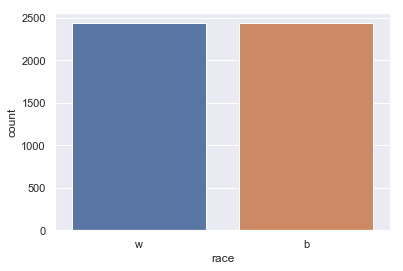

In [20]:
sns.countplot(data['race'])

**From the above plot, we can see an almost equal number of applicants for both races.**

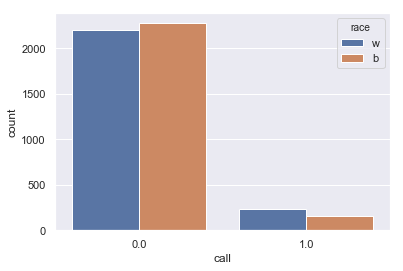

In [24]:
sns.countplot(x=data.call, hue=data.race)

From the above plot, we cannot make out a difference in the callback rates for white and black people.

**2.**

**Null_Hypothesis : There is no significant differnece in the callback rates between black and white people.**

**Alternative Hypothesis: There is a significant difference in the callback rates between black and white people.**

In [7]:
# Your solution to Q3 here

In [54]:
Overall_callback_rate = len(data.loc[data.call == 1.0]) / len(data)

In [58]:
Overall_callback_rate = round(Overall_callback_rate,4)

Moving on to calculate the standard error

In [62]:
std_err = np.sqrt(Overall_callback_rate*(1-Overall_callback_rate)/len(data))

In [64]:
std_err = round(std_err, 4)

**For the 95% confidence interval, we know that z= 1.96 for a normal distribution**

In [67]:
min_val = Overall_callback_rate - std_err
max_val = Overall_callback_rate + std_err
percentile_range_95 = (min_val, max_val)

The 95th percentile range has been displayed below.

In [68]:
percentile_range_95

(0.0766, 0.0844)

Next, we will calculate the t-statistic for black vs. white people and compute the p-value to test for significance.

In [94]:
all_whites = data['call'].loc[data.race == 'b']

In [93]:
all_blacks = data['call'].loc[data.race == 'w']

In [95]:
from scipy.stats import ttest_ind
t, p = ttest_ind(all_whites, all_blacks)

In [96]:
t

-4.114705290861751

In [97]:
p

3.940802103128886e-05

<font color='red'>**From the above p-value, we see that p value is significantly lower than 0.05. Hence, we can conclude that that our test indicates some correlation between race and callback rate**</font>

**Let us also perform the bootstrap test of the difference of means**

In [121]:
b_mean = len(data.loc[(data.race == 'b') & (data.call == 1.0)])/len(data['call'].loc[data.race == 'b'])

In [120]:
w_mean = len(data.loc[(data.race == 'w') & (data.call == 1.0)])/len(data['call'].loc[data.race == 'w'])

In [124]:
diff_means = w_mean - b_mean

In [127]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [126]:
def draw_bs_reps(data, func, size=1):
   # """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates


In [129]:
diff_means

0.032032854209445585

In [130]:
bs_replicates_w = draw_bs_reps(all_whites , np.mean, size=10000)

In [131]:
bs_replicates_b = draw_bs_reps(all_blacks , np.mean, size=10000)

In [132]:
replicates_diff = bs_replicates_w - bs_replicates_b

In [135]:
 p =np.sum(replicates_diff>=diff_means) / len(replicates_diff)

In [136]:
p

0.0

**We get a p value of which means that for 10000 bootstrap samples drawn, there wasn't even a single value observed that suggests the null hypothesis. This is evident from our earlier test as well.**

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

**4.**

**Using graphical EDA, we couldn't find any sifnificant results. The number of whites vs black applicants reviewed was about the same. Then we performed a count operation using seaborn and white there were noticeable differences in the call back rates, there was nothing compelling to stake our claim**

**We then performed a 2 sample t-significant test between the callback values for blacks vs whites and obtained a p-value significantly lower than the 5% significance level.**

**5.**

**We cannot conclude that race is perhaps the most significant factor for applicants being called up. There are other variables in our dataset that we didn't evalate. These include years of experience, number of jobs, level of education and so on. We can however state that there is som correlation between callback rates and race.**